Loading dataset...
Dataset loaded successfully.
Splitting data into features and target...
Standardizing features...
Splitting data into training and testing sets...
Defining Naive Bayes classifier...
Enabling multithreading for training...
Training Naive Bayes model...
Naive Bayes model trained successfully!
Making predictions on the test set...
Evaluating the model...
Evaluation Metrics:
Confusion Matrix:
 [[83347  1802]
 [12075 73365]]
Precision: 0.9760267138504929
Recall: 0.8586727528089888
Accuracy: 0.9186524336270216
F1 Score: 0.9135965431145592
Plotting the confusion matrix...


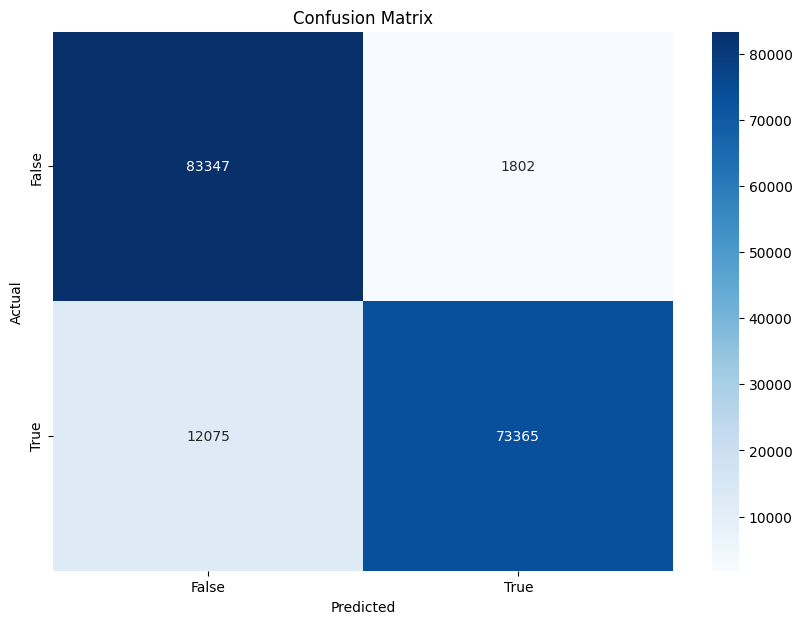

Saving the trained model and the scaler...
Trained model and scaler saved successfully!


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'./creditcard_2023.csv'
print("Loading dataset...")
data = pd.read_csv(file_path)
print("Dataset loaded successfully.")

# Split the data into features and target
print("Splitting data into features and target...")
X = data.drop(columns=['id', 'Class'])
y = data['Class']

# Standardize the features
print("Standardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the Naive Bayes classifier
print("Defining Naive Bayes classifier...")
nb = GaussianNB()

# Enable multithreading for training
print("Enabling multithreading for training...")
os.environ['OMP_NUM_THREADS'] = str(os.cpu_count())

# Train the Naive Bayes model
print("Training Naive Bayes model...")
nb.fit(X_train, y_train)
print("Naive Bayes model trained successfully!")

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred = nb.predict(X_test)

# Evaluate the model
print("Evaluating the model...")
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Plot the confusion matrix
print("Plotting the confusion matrix...")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model and the scaler
print("Saving the trained model and the scaler...")
joblib.dump(nb, '1-naive_bayes_fraud_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Trained model and scaler saved successfully!")